---
### **GRIP - The Sparks Foundation** 
### **Task 6 - Prediction using Decision Tree Algorithm** 
### **The task is to create a Decision Tree Classifier and visualize it graphically** 
### *Author : Kaviya Sri.A N*
---

### **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

### **Reading the Dataset**

In [29]:
df = pd.read_csv("Iris.csv", index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


### **Data Analysis**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.4+ KB


In [32]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
df.shape

(150, 5)

In [34]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### **Checking for missing values**

In [35]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **Data Visualization**

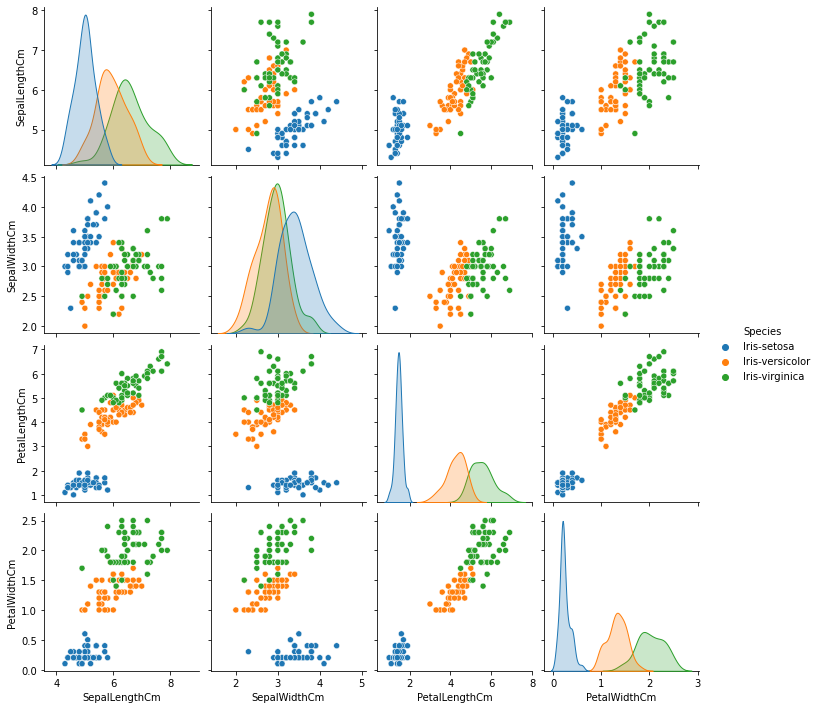

In [36]:
sns.pairplot(df, hue='Species')

<AxesSubplot:>

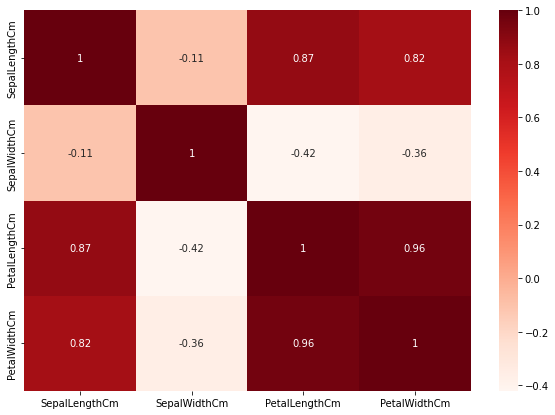

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True, cmap='Reds')

### **Splitting feature and target variables**

In [38]:
X = df.drop(labels= 'Species', axis= 1)
y = df['Species']

### **Splitting the variables as train and test datasets**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [40]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(112, 4) (112,) (38, 4) (38,)


### **Training the Decision Tree Model**

In [41]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1234)
classifier.fit(X,y)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

### **Prediction using our model**

In [42]:
predicted = classifier.predict(X_test)

### **Model Evaluation**

In [43]:
print("Confusion Matrix")
print(confusion_matrix(y_test,predicted))

Confusion Matrix
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [44]:
print("Accuracy Score :",accuracy_score(y_test,predicted)*100)

Accuracy Score : 100.0


### **Visualizing the Decision Tree**

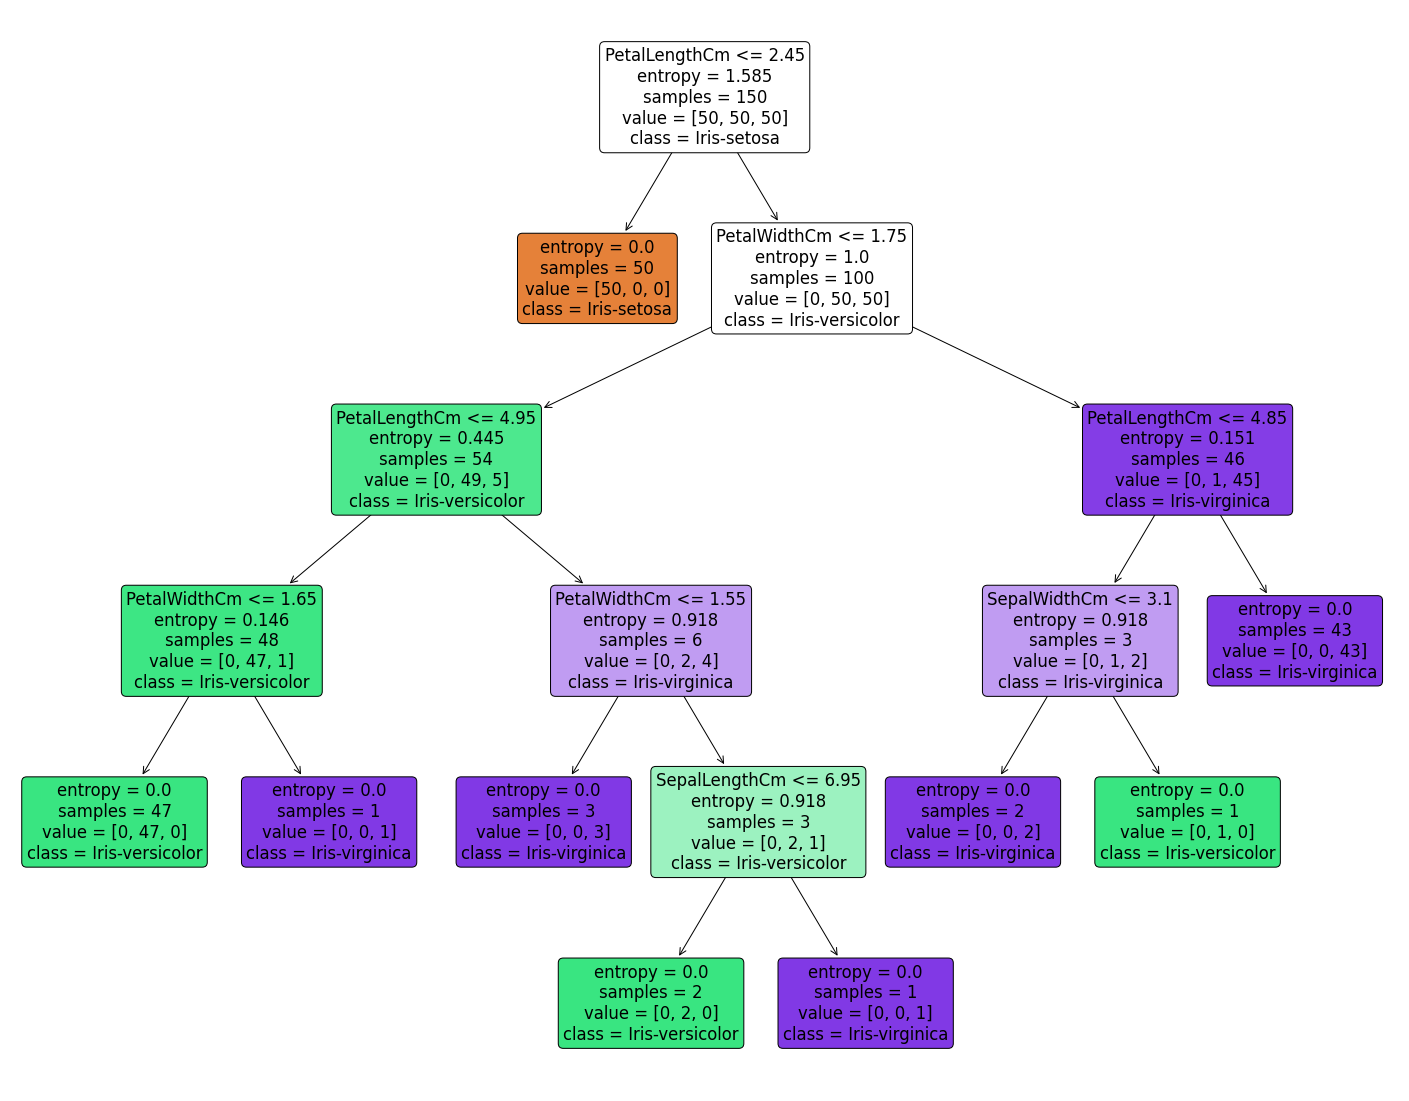

In [45]:
fig = plt.figure(figsize=(25,20))
plot_tree(classifier, feature_names= df.columns[:-1], class_names= df['Species'].unique(), filled = True, rounded = True)
plt.show()

### *We can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.*

---